In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scorecard import Scorecard
import time
from ucimlrepo import fetch_ucirepo 

from sklearn.metrics import accuracy_score

## aesthetic evaluation dataset

In [14]:
aesthetic_evaluation_data = pd.read_csv('datasets/aesthetic_evaluation_data.csv')
aesthetic_evaluation_objective = aesthetic_evaluation_data['Objective Evaluation']
aesthetic_evaluation_data = aesthetic_evaluation_data.drop(columns=['Image Filename','Author','Objective Evaluation', 'sX2L Value','sX2a Value','sX2b Value','sX2Lab Value','sEMDL Value','sEMDa Value','sEMDb Value','sEMDLab Value'])
aesthetic_evaluation_X = aesthetic_evaluation_data.drop(columns='Subjective Evaluation')
aesthetic_evaluation_y = aesthetic_evaluation_data['Subjective Evaluation']

aesthetic_evaluation_data.head()

,Subjective Evaluation,BRA Value,LBC Value,UNR Value,BCE Value,BCD Value,BAD Value,BOD Value,pBRA Value,pLBC Value,...,pBAD Value,pBOD Value,cX2L Value,cX2a Value,cX2b Value,cX2Lab Value,cEMDL Value,cEMDa Value,cEMDb Value,cEMDLab Value
0,Good,1.149009,0.830915,0.107618,0.938534,1.934477,4.885198,17.296370,0.049401,0.033356,...,0.029188,0.103340,0.097502,0.009506,0.217169,0.100670,1.503086,0.030362,0.291363,0.210082
1,Good,2.368824,1.326447,1.599444,0.272997,0.035378,19.932998,68.761479,0.113919,0.058509,...,0.117875,0.406627,0.305692,0.159653,0.193317,0.061736,1.248600,0.206529,0.351693,0.105346
2,Good,1.409939,0.950935,0.278358,1.229293,2.221074,22.277770,38.323430,0.067231,0.038613,...,0.120132,0.206658,0.109386,0.024217,0.280625,0.012974,0.545858,0.075520,0.304185,0.049345
3,Good,2.059918,0.720926,1.786307,1.065381,1.995007,25.163410,31.631070,0.100705,0.032141,...,0.156030,0.196133,0.038581,0.032267,0.026153,0.010779,0.334111,0.105626,0.137693,0.031455
4,Good,2.452595,0.798596,1.868745,1.070148,1.218189,0.395585,31.426783,0.117249,0.035235,...,0.002820,0.224062,0.021259,0.027071,0.029206,0.006495,0.165401,0.081549,0.091768,0.030546


In [3]:
aesthetic_evaluation_y.value_counts()

Subjective Evaluation
Good         595
Fair         353
Excellent    308
Poor         102
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Subjective Evaluation')

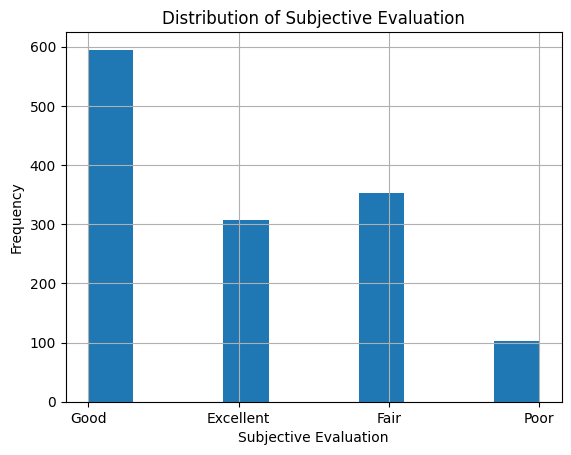

In [4]:
aesthetic_evaluation_y.hist()
plt.xlabel('Subjective Evaluation')
plt.ylabel('Frequency')
plt.title('Distribution of Subjective Evaluation')

In [5]:
# accuracy of 'objective evaluation' (relative to the target, 'subjective evaluation')
acc = accuracy_score(aesthetic_evaluation_y, aesthetic_evaluation_objective)
print(f'Accuracy of objective evaluation: {acc}')

Accuracy of objective evaluation: 0.5876288659793815


In [16]:
categorical_columns = aesthetic_evaluation_X.select_dtypes(include=['object']).columns
print(f'Categorical columns: {categorical_columns}')

# encode categorical columns
for col in categorical_columns:
    aesthetic_evaluation_X[col] = aesthetic_evaluation_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {aesthetic_evaluation_X[col].unique()}")

Categorical columns: Index([], dtype='object')


SBC reduction
number of features:  22
original num target classes:  4
original num observations:  1358
mapping:  0         Good
1    Excellent
2         Fair
3         Poor
dtype: object
new num features:  23
new num target classes:  2
new num observations:  4074  (original num observations * 3 )
          0         1         2         3         4          5          6  \
0  1.149009  0.830915  0.107618  0.938534  1.934477   4.885198  17.296370   
1  1.149009  0.830915  0.107618  0.938534  1.934477   4.885198  17.296370   
2  1.149009  0.830915  0.107618  0.938534  1.934477   4.885198  17.296370   
3  2.368824  1.326447  1.599444  0.272997  0.035378  19.932998  68.761479   
4  2.368824  1.326447  1.599444  0.272997  0.035378  19.932998  68.761479   

          7         8         9  ...        14        15        16        17  \
0  0.049401  0.033356  0.005522  ...  0.097502  0.009506  0.217169  0.100670   
1  0.049401  0.033356  0.005522  ...  0.097502  0.009506  0.217169  0.100670   

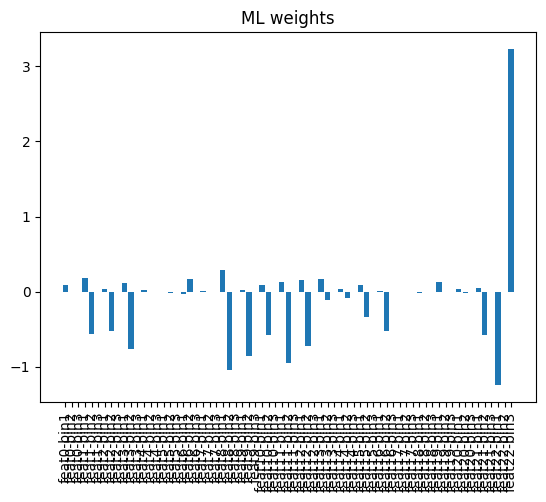

num of zero weights:  29
num of non-zero weights:  40
        Feature    Weight
0    feat0-bin1  0.086548
3    feat1-bin1  0.187047
4    feat1-bin2 -0.566102
6    feat2-bin1  0.029011
7    feat2-bin2 -0.519643
9    feat3-bin1  0.112259
10   feat3-bin2 -0.763872
12   feat4-bin1  0.028066
15   feat5-bin1  0.001295
16   feat5-bin2 -0.018390
18   feat6-bin1 -0.035972
19   feat6-bin2  0.170980
21   feat7-bin1  0.002356
22   feat7-bin2 -0.009418
24   feat8-bin1  0.293216
25   feat8-bin2 -1.044402
27   feat9-bin1  0.027051
28   feat9-bin2 -0.851402
30  feat10-bin1  0.092268
31  feat10-bin2 -0.574694
33  feat11-bin1  0.130780
34  feat11-bin2 -0.948585
36  feat12-bin1  0.155191
37  feat12-bin2 -0.718740
39  feat13-bin1  0.161709
40  feat13-bin2 -0.108733
42  feat14-bin1  0.035932
43  feat14-bin2 -0.080268
45  feat15-bin1  0.084138
46  feat15-bin2 -0.344166
48  feat16-bin1  0.005065
49  feat16-bin2 -0.527143
54  feat18-bin1 -0.014513
57  feat19-bin1  0.125637
60  feat20-bin1  0.031533
61  feat20

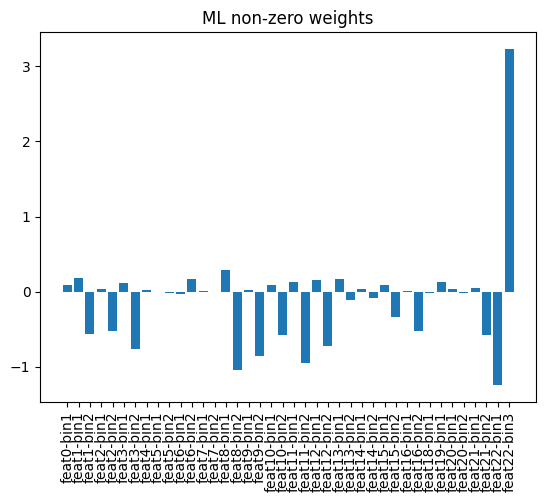

MSEs:  [0.25735294117647056, 0.25245098039215685, 0.25245098039215685, 0.27450980392156865, 0.23095823095823095, 0.21621621621621623, 0.2113022113022113, 0.25061425061425063, 0.22358722358722358, 0.24078624078624078]
accuracies:  [0.7426470588235294, 0.7475490196078431, 0.7475490196078431, 0.7254901960784313, 0.769041769041769, 0.7837837837837838, 0.7886977886977887, 0.7493857493857494, 0.7764127764127764, 0.7592137592137592]
AUCs:  [0.8433519982433025, 0.832153052261748, 0.845245937637242, 0.8146684233640755, 0.8785950413223141, 0.8613774104683196, 0.8913223140495867, 0.8607713498622589, 0.8766942148760332, 0.8625619834710744]
mean MSE:  0.24102290793467263
mean accuracy:  0.7589770920653274
mean AUC:  0.8566741725555953
Execution time: 6.472443103790283 seconds


In [18]:
start_time = time.time()

scorecard = Scorecard()
caim_1ook_ml_model, caim_1ook_ml_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=True,
                num_nonzero_weights=None)

scorecard.cross_val_score()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

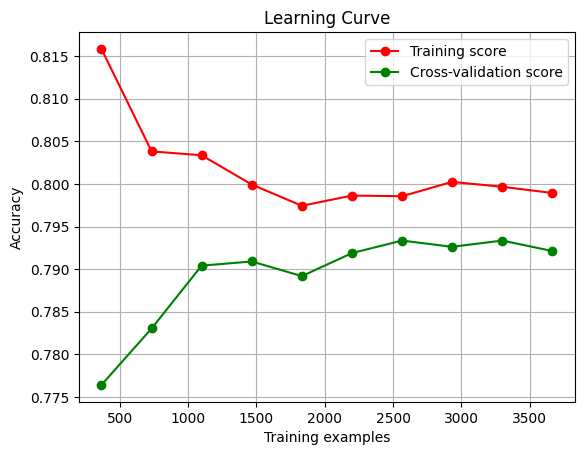

In [7]:
scorecard.plot_learning_curve()

threshold: 0.1, accuracy: 0.7842415316642121, sparsity: 21
threshold: 0.01, accuracy: 0.7977417771232205, sparsity: 38
threshold: 0.001, accuracy: 0.7977417771232205, sparsity: 39
threshold: 0.0001, accuracy: 0.7977417771232205, sparsity: 39
threshold: 0, accuracy: 0.7977417771232205, sparsity: 39


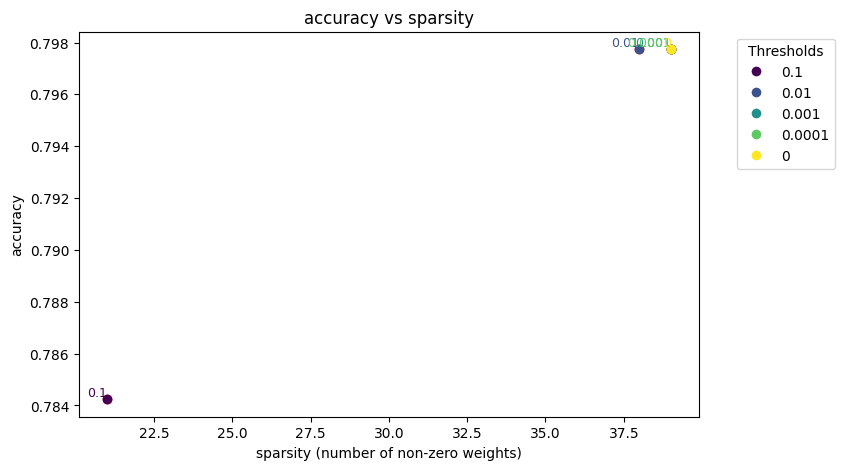

In [8]:
scorecard.plot_accuracy_vs_sparsity()

In [9]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

Number of non-zero weights: 39


SBC reduction
number of features:  22
original num target classes:  4
original num observations:  1358
mapping:  0         Good
1    Excellent
2         Fair
3         Poor
dtype: object
new num features:  23
new num target classes:  2
new num observations:  4074  (original num observations * 3 )
          0         1         2         3         4          5          6  \
0  1.149009  0.830915  0.107618  0.938534  1.934477   4.885198  17.296370   
1  1.149009  0.830915  0.107618  0.938534  1.934477   4.885198  17.296370   
2  1.149009  0.830915  0.107618  0.938534  1.934477   4.885198  17.296370   
3  2.368824  1.326447  1.599444  0.272997  0.035378  19.932998  68.761479   
4  2.368824  1.326447  1.599444  0.272997  0.035378  19.932998  68.761479   

          7         8         9  ...        14        15        16        17  \
0  0.049401  0.033356  0.005522  ...  0.097502  0.009506  0.217169  0.100670   
1  0.049401  0.033356  0.005522  ...  0.097502  0.009506  0.217169  0.100670   

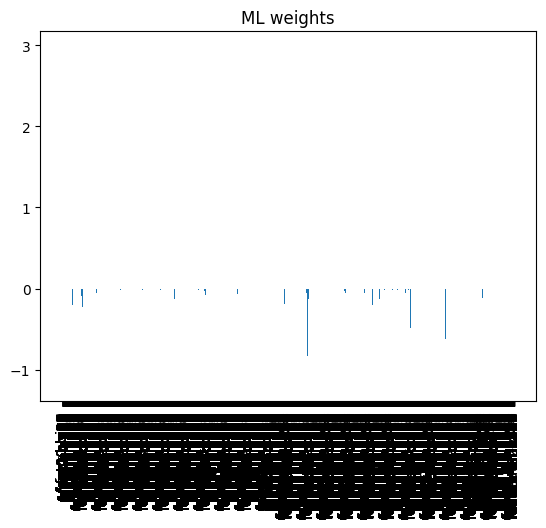

num of zero weights:  23779
num of non-zero weights:  6077
              Feature    Weight
5          feat0-bin6 -0.026176
9         feat0-bin10 -0.016888
17        feat0-bin18 -0.000183
28        feat0-bin29 -0.006523
36        feat0-bin37 -0.017210
...               ...       ...
29850  feat21-bin1354 -0.472177
29851  feat21-bin1355 -0.029152
29852  feat21-bin1356 -0.000077
29854     feat22-bin1  0.978724
29855     feat22-bin2  2.964226

[6077 rows x 2 columns]


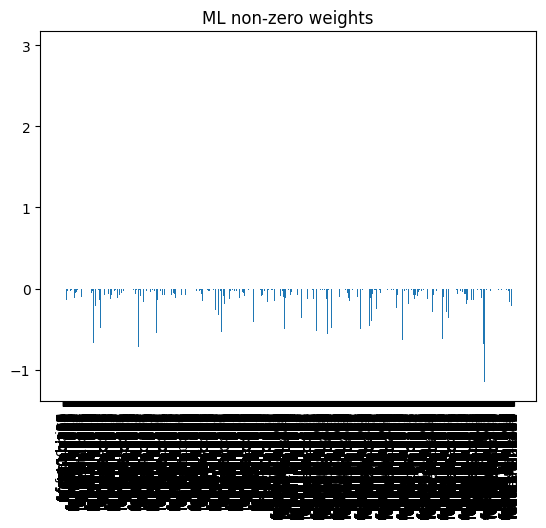

MSEs:  [0.25735294117647056, 0.25245098039215685, 0.25245098039215685, 0.27450980392156865, 0.2334152334152334, 0.21621621621621623, 0.2113022113022113, 0.25061425061425063, 0.22113022113022113, 0.24078624078624078]
accuracies:  [0.7426470588235294, 0.7475490196078431, 0.7475490196078431, 0.7254901960784313, 0.7665847665847666, 0.7837837837837838, 0.7886977886977887, 0.7493857493857494, 0.7788697788697788, 0.7592137592137592]
AUCs:  [0.8433519982433025, 0.8322353974527887, 0.8452184892402285, 0.8146684233640755, 0.8786225895316804, 0.8613223140495867, 0.8913498622589531, 0.8607713498622589, 0.8766391184573004, 0.8624242424242424]
mean MSE:  0.24102290793467263
mean accuracy:  0.7589770920653274
mean AUC:  0.8566603784884418
Execution time: 147.67945003509521 seconds


In [ ]:
start_time = time.time()
scorecard = Scorecard()
scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=True,
                num_nonzero_weights=num_nonzero_weights)

scorecard.cross_val_score()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

threshold: 0.1, accuracy: 0.8038782523318606, sparsity: 857
threshold: 0.01, accuracy: 0.8127147766323024, sparsity: 2954
threshold: 0.001, accuracy: 0.8127147766323024, sparsity: 4607
threshold: 0.0001, accuracy: 0.8127147766323024, sparsity: 5650
threshold: 0, accuracy: 0.8127147766323024, sparsity: 6077


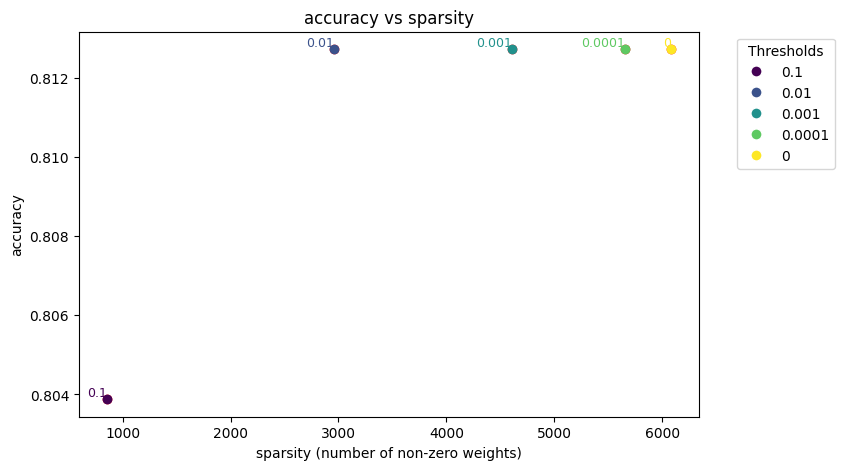

In [11]:
scorecard.plot_accuracy_vs_sparsity()

SBC reduction
number of features:  22
original num target classes:  4
original num observations:  1358
mapping:  0         Good
1    Excellent
2         Fair
3         Poor
dtype: object
new num features:  23
new num target classes:  2
new num observations:  4074  (original num observations * 3 )
          0         1         2         3         4          5          6  \
0  1.149009  0.830915  0.107618  0.938534  1.934477   4.885198  17.296370   
1  1.149009  0.830915  0.107618  0.938534  1.934477   4.885198  17.296370   
2  1.149009  0.830915  0.107618  0.938534  1.934477   4.885198  17.296370   
3  2.368824  1.326447  1.599444  0.272997  0.035378  19.932998  68.761479   
4  2.368824  1.326447  1.599444  0.272997  0.035378  19.932998  68.761479   

          7         8         9  ...        14        15        16        17  \
0  0.049401  0.033356  0.005522  ...  0.097502  0.009506  0.217169  0.100670   
1  0.049401  0.033356  0.005522  ...  0.097502  0.009506  0.217169  0.100670   

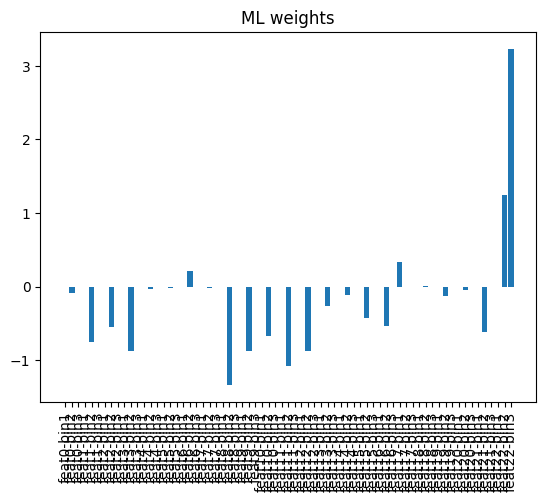

num of zero weights:  45
num of non-zero weights:  24
        Feature    Weight
1    feat0-bin2 -0.082188
4    feat1-bin2 -0.753962
7    feat2-bin2 -0.550818
10   feat3-bin2 -0.877144
13   feat4-bin2 -0.027258
16   feat5-bin2 -0.019554
19   feat6-bin2  0.207381
22   feat7-bin2 -0.013462
25   feat8-bin2 -1.336119
28   feat9-bin2 -0.877752
31  feat10-bin2 -0.665464
34  feat11-bin2 -1.080210
37  feat12-bin2 -0.874178
40  feat13-bin2 -0.270062
43  feat14-bin2 -0.116416
46  feat15-bin2 -0.428251
49  feat16-bin2 -0.531122
51  feat17-bin1  0.337636
55  feat18-bin2  0.007758
58  feat19-bin2 -0.123198
61  feat20-bin2 -0.047916
64  feat21-bin2 -0.620268
67  feat22-bin2  1.244188
68  feat22-bin3  3.232443


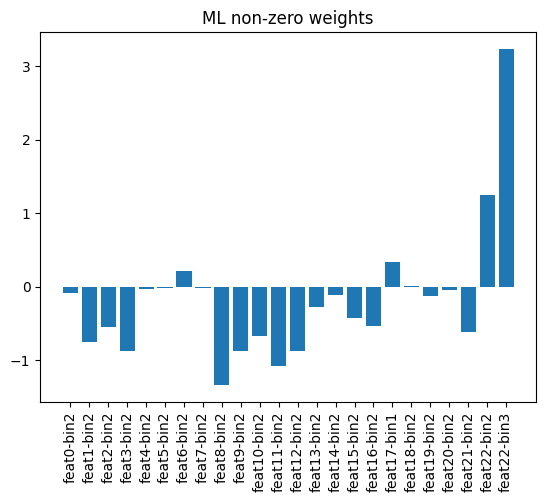

MSEs:  [0.25735294117647056, 0.25245098039215685, 0.25245098039215685, 0.27450980392156865, 0.23095823095823095, 0.21621621621621623, 0.2113022113022113, 0.25061425061425063, 0.22113022113022113, 0.24078624078624078]
accuracies:  [0.7426470588235294, 0.7475490196078431, 0.7475490196078431, 0.7254901960784313, 0.769041769041769, 0.7837837837837838, 0.7886977886977887, 0.7493857493857494, 0.7788697788697788, 0.7592137592137592]
AUCs:  [0.8433519982433025, 0.832153052261748, 0.845245937637242, 0.8146684233640755, 0.8785950413223141, 0.8613774104683196, 0.8913498622589531, 0.8607438016528925, 0.8766942148760332, 0.862534435261708]
mean MSE:  0.2407772076889724
mean accuracy:  0.7592227923110276
mean AUC:  0.8566714177346588
Execution time: 5.557287931442261 seconds


In [ ]:
start_time = time.time()
scorecard = Scorecard()
scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING',
                model_method='ML', 
                use_sbc=True,
                num_nonzero_weights=None)

scorecard.cross_val_score()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

threshold: 0.1, accuracy: 0.7982326951399117, sparsity: 18
threshold: 0.01, accuracy: 0.7977417771232205, sparsity: 23
threshold: 0.001, accuracy: 0.7977417771232205, sparsity: 24
threshold: 0.0001, accuracy: 0.7977417771232205, sparsity: 24
threshold: 0, accuracy: 0.7977417771232205, sparsity: 24


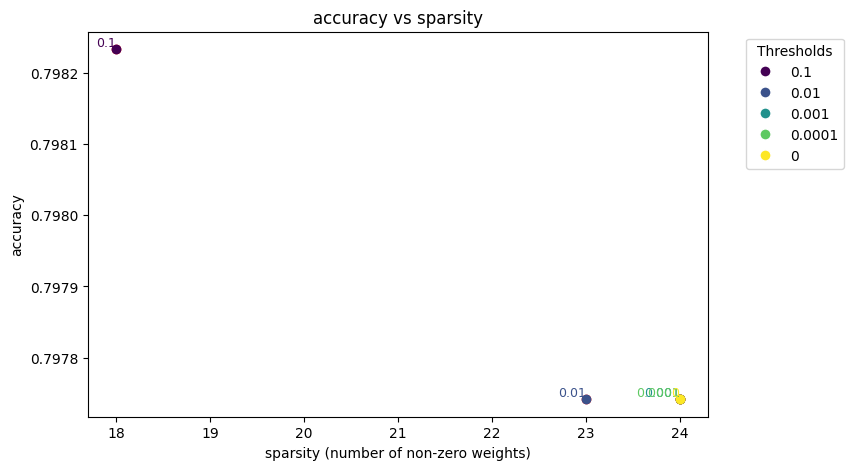

In [13]:
scorecard.plot_accuracy_vs_sparsity()

In [14]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

Number of non-zero weights: 24


SBC reduction
number of features:  22
original num target classes:  4
original num observations:  1358
mapping:  0         Good
1    Excellent
2         Fair
3         Poor
dtype: object
new num features:  23
new num target classes:  2
new num observations:  4074  (original num observations * 3 )
          0         1         2         3         4          5          6  \
0  1.149009  0.830915  0.107618  0.938534  1.934477   4.885198  17.296370   
1  1.149009  0.830915  0.107618  0.938534  1.934477   4.885198  17.296370   
2  1.149009  0.830915  0.107618  0.938534  1.934477   4.885198  17.296370   
3  2.368824  1.326447  1.599444  0.272997  0.035378  19.932998  68.761479   
4  2.368824  1.326447  1.599444  0.272997  0.035378  19.932998  68.761479   

          7         8         9  ...        14        15        16        17  \
0  0.049401  0.033356  0.005522  ...  0.097502  0.009506  0.217169  0.100670   
1  0.049401  0.033356  0.005522  ...  0.097502  0.009506  0.217169  0.100670   

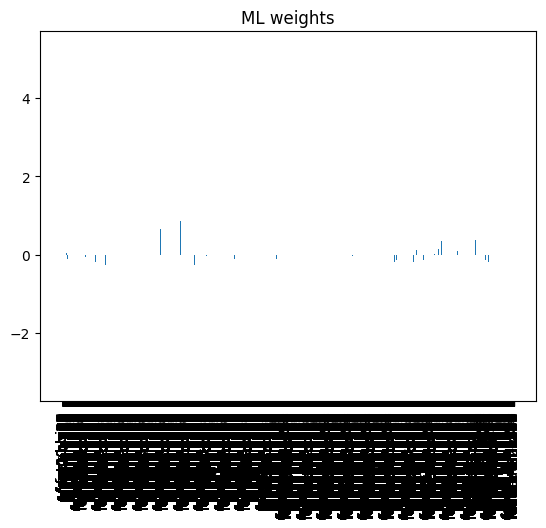

num of zero weights:  27805
num of non-zero weights:  2051
              Feature    Weight
2          feat0-bin3  0.039533
4          feat0-bin5  0.000530
7          feat0-bin8  0.052571
40        feat0-bin41 -0.009088
41        feat0-bin42 -0.009645
...               ...       ...
29794  feat21-bin1298 -0.222191
29813  feat21-bin1317  0.014570
29817  feat21-bin1321  0.005888
29854     feat22-bin1  2.495817
29855     feat22-bin2  5.270604

[2051 rows x 2 columns]


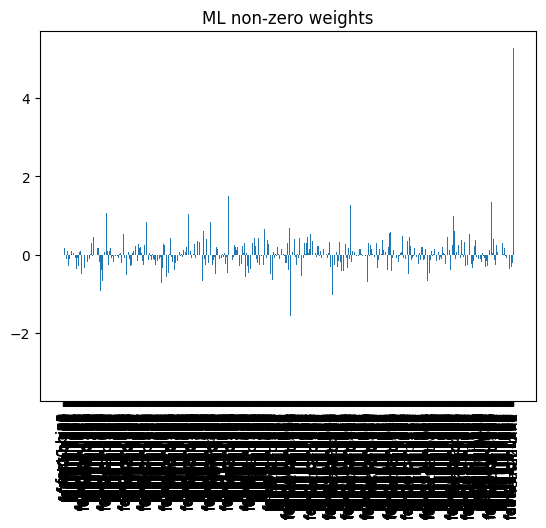

MSEs:  [0.25735294117647056, 0.25245098039215685, 0.25245098039215685, 0.27450980392156865, 0.23095823095823095, 0.21621621621621623, 0.2113022113022113, 0.25061425061425063, 0.22113022113022113, 0.24078624078624078]
accuracies:  [0.7426470588235294, 0.7475490196078431, 0.7475490196078431, 0.7254901960784313, 0.769041769041769, 0.7837837837837838, 0.7886977886977887, 0.7493857493857494, 0.7788697788697788, 0.7592137592137592]
AUCs:  [0.8433519982433025, 0.8322628458498024, 0.8453008344312694, 0.8146684233640755, 0.8785950413223141, 0.8613774104683196, 0.8913498622589531, 0.8607988980716252, 0.8766391184573004, 0.8624242424242424]
mean MSE:  0.2407772076889724
mean accuracy:  0.7592227923110276
mean AUC:  0.8566768674891205
Execution time: 529.7792887687683 seconds


In [ ]:
start_time = time.time()
scorecard = Scorecard()
scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING',
                model_method='ML', 
                use_sbc=True,
                num_nonzero_weights=num_nonzero_weights)

scorecard.cross_val_score()
end_time = time.time()
print(f'Execution time: {end_time - start_time} seconds')

threshold: 0.1, accuracy: 0.9447717231222386, sparsity: 1269
threshold: 0.01, accuracy: 0.9926362297496318, sparsity: 1910
threshold: 0.001, accuracy: 0.9926362297496318, sparsity: 1997
threshold: 0.0001, accuracy: 0.9928816887579774, sparsity: 2036
threshold: 0, accuracy: 0.9928816887579774, sparsity: 2051


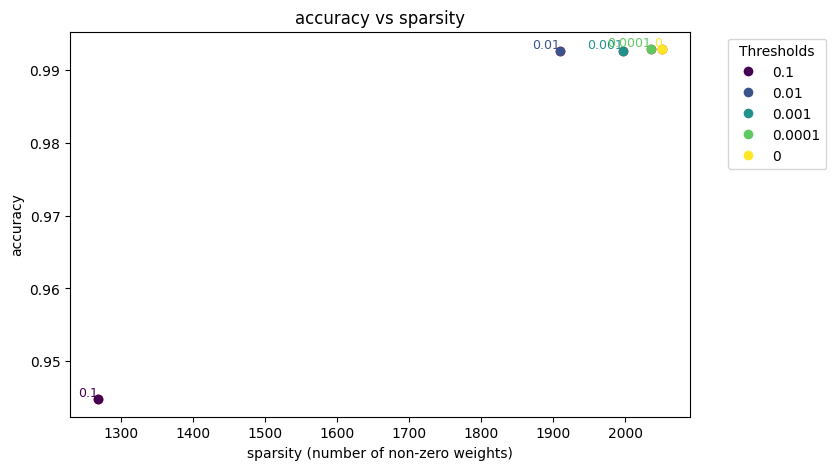

In [16]:
scorecard.plot_accuracy_vs_sparsity()

## wine quality dataset
model wine quality, score between 0 and 10, based on physicochemical tests

https://archive.ics.uci.edu/dataset/186/wine+quality

In [2]:
# fetch dataset 
wine_quality_data = fetch_ucirepo(id=186) 

# data (as pandas dataframes) 
wine_quality_X = wine_quality_data.data.features 
wine_quality_y = wine_quality_data.data.targets 
  
# metadata 
print(wine_quality_data.metadata) 
  
# variable information 
print(wine_quality_data.variables) 

{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

In [3]:
wine_quality_y = pd.Series(wine_quality_y['quality'], name='quality')

In [ ]:
wine_quality_y.value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

Text(0.5, 1.0, 'distribution of wine quality')

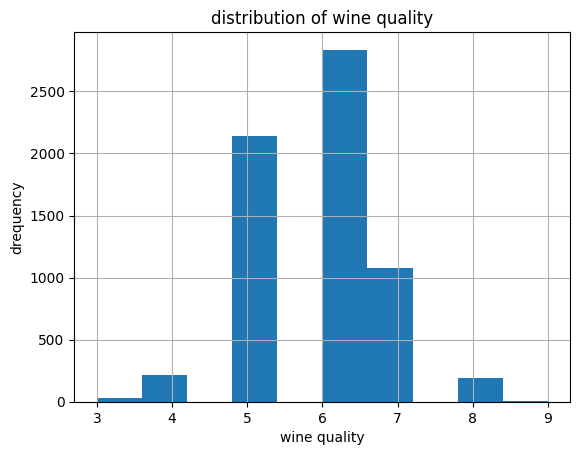

In [5]:
wine_quality_y.hist()
plt.xlabel('wine quality')
plt.ylabel('drequency')
plt.title('distribution of wine quality')

In [ ]:
categorical_columns = wine_quality_X.select_dtypes(include=['object']).columns
print(f'Categorical columns: {categorical_columns}')

# encode categorical columns
for col in categorical_columns:
    wine_quality_X[col] = wine_quality_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {wine_quality_X[col].unique()}")

SBC reduction
number of features:  11
original num target classes:  7
original num observations:  6497
new num features:  12
new num target classes:  2
new num observations:  38982  (original num observations * 6 )
     0    1    2    3      4     5     6       7     8     9   10   11  \
0  7.4  0.7  0.0  1.9  0.076  11.0  34.0  0.9978  3.51  0.56  9.4  0.0   
1  7.4  0.7  0.0  1.9  0.076  11.0  34.0  0.9978  3.51  0.56  9.4  1.0   
2  7.4  0.7  0.0  1.9  0.076  11.0  34.0  0.9978  3.51  0.56  9.4  2.0   
3  7.4  0.7  0.0  1.9  0.076  11.0  34.0  0.9978  3.51  0.56  9.4  3.0   
4  7.4  0.7  0.0  1.9  0.076  11.0  34.0  0.9978  3.51  0.56  9.4  4.0   

   (binary_label)  
0               0  
1               0  
2               0  
3               0  
4               0  

discretization thresholds
num of features:  12
categorical features:  Index([], dtype='object')
aqui 1
sbc_column:  11
inicio fit  []
aqui 2
aqui 3
categorical aqui:  []
X shape[1]:  11
Feature non categorical  0
# 0  G

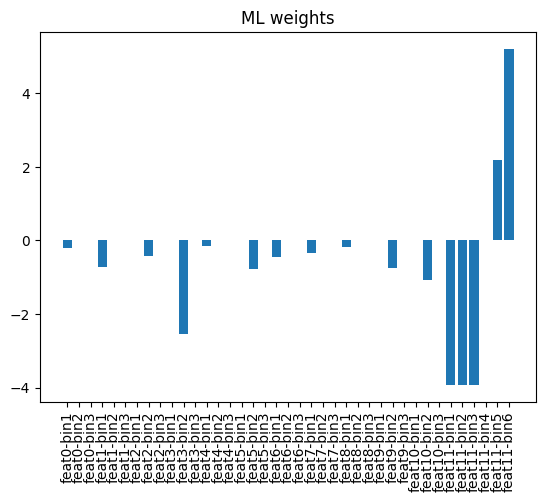

num of zero weights:  23
num of non-zero weights:  16
        Feature    Weight
0    feat0-bin1 -0.198871
3    feat1-bin1 -0.726809
7    feat2-bin2 -0.423252
10   feat3-bin2 -2.532295
12   feat4-bin1 -0.139754
16   feat5-bin2 -0.766530
18   feat6-bin1 -0.461728
21   feat7-bin1 -0.329031
24   feat8-bin1 -0.170018
28   feat9-bin2 -0.761806
31  feat10-bin2 -1.078389
33  feat11-bin1 -3.925263
34  feat11-bin2 -3.925260
35  feat11-bin3 -3.925260
37  feat11-bin5  2.178898
38  feat11-bin6  5.206416


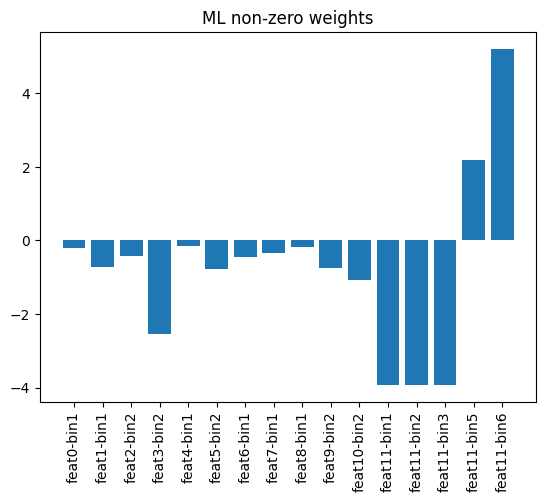

MSEs:  [0.05488586817132598, 0.04462682739163888, 0.055926115956900974, 0.05720882503848127, 0.05413032324268856, 0.054643406875320676, 0.05310415597742432, 0.046947152385838894, 0.05284761416110826, 0.05413032324268856]
accuracies:  [0.945114131828674, 0.9553731726083611, 0.944073884043099, 0.9427911749615188, 0.9458696767573115, 0.9453565931246793, 0.9468958440225757, 0.9530528476141611, 0.9471523858388917, 0.9458696767573115]
AUCs:  [0.968320884788354, 0.9688051673361769, 0.9556479994037959, 0.9547133251631281, 0.952582102282137, 0.9563580620052334, 0.9626109602199331, 0.9687748418402835, 0.958275024013779, 0.9624174008810572]
mean MSE:  0.05284506124434163
mean accuracy:  0.9471549387556584
mean AUC:  0.9608505767933877
Execution time: 99.53740906715393 seconds


In [ ]:
start_time = time.time()

scorecard = Scorecard()
car_caim_1ook_ml_model, car_caim_1ook_ml_weights = scorecard.fit(wine_quality_X, wine_quality_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=True)
scorecard.cross_val_score()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [7]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

Number of non-zero weights: 16


SBC reduction
number of features:  11
original num target classes:  7
original num observations:  6497
new num features:  12
new num target classes:  2
new num observations:  38982  (original num observations * 6 )
     0    1    2    3      4     5     6       7     8     9   10   11  \
0  7.4  0.7  0.0  1.9  0.076  11.0  34.0  0.9978  3.51  0.56  9.4  0.0   
1  7.4  0.7  0.0  1.9  0.076  11.0  34.0  0.9978  3.51  0.56  9.4  1.0   
2  7.4  0.7  0.0  1.9  0.076  11.0  34.0  0.9978  3.51  0.56  9.4  2.0   
3  7.4  0.7  0.0  1.9  0.076  11.0  34.0  0.9978  3.51  0.56  9.4  3.0   
4  7.4  0.7  0.0  1.9  0.076  11.0  34.0  0.9978  3.51  0.56  9.4  4.0   

   (binary_label)  
0               0  
1               0  
2               0  
3               0  
4               0  

discretization thresholds

thresholds  {0: [3.8499999999999996, 4.05, 4.300000000000001, 4.45, 4.55, 4.65, 4.75, 4.85, 4.95, 5.05, 5.15, 5.25, 5.35, 5.45, 5.55, 5.65, 5.75, 5.85, 5.95, 6.05, 6.125, 6.175000000000001, 6.

/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


ML best parameters:  {'C': 1.0}
ML best alpha:  1.0
ML weights:
           Feature    Weight
0      feat0-bin1  0.000000
1      feat0-bin2  0.000000
2      feat0-bin3  0.000000
3      feat0-bin4  0.000000
4      feat0-bin5  0.841785
...           ...       ...
2640  feat11-bin1 -0.871454
2641  feat11-bin2 -0.871452
2642  feat11-bin3  2.553523
2643  feat11-bin4  4.946965
2644  feat11-bin5  8.570699

[2645 rows x 2 columns]


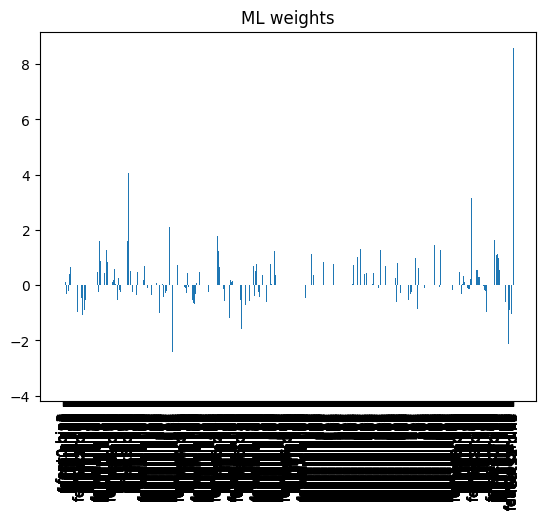

num of zero weights:  1576
num of non-zero weights:  1069
          Feature    Weight
4      feat0-bin5  0.841785
8      feat0-bin9 -1.465359
9     feat0-bin10 -0.329183
10    feat0-bin11 -0.241304
12    feat0-bin13 -1.250328
...           ...       ...
2640  feat11-bin1 -0.871454
2641  feat11-bin2 -0.871452
2642  feat11-bin3  2.553523
2643  feat11-bin4  4.946965
2644  feat11-bin5  8.570699

[1069 rows x 2 columns]


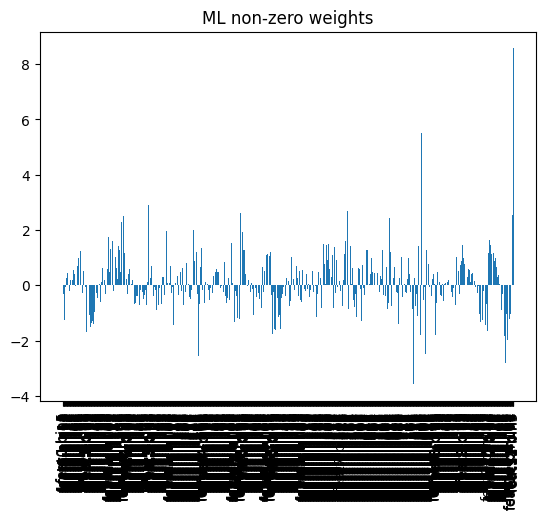

MSEs:  [0.05411644011284945, 0.04462682739163888, 0.055413032324268856, 0.05720882503848127, 0.054643406875320676, 0.05515649050795279, 0.05284761416110826, 0.04669061056952283, 0.05310415597742432, 0.05413032324268856]
accuracies:  [0.9458835598871506, 0.9553731726083611, 0.9445869676757311, 0.9427911749615188, 0.9453565931246793, 0.9448435094920472, 0.9471523858388917, 0.9533093894304772, 0.9468958440225757, 0.9458696767573115]
AUCs:  [0.9683943550039426, 0.9688941594282983, 0.9558260325924945, 0.9546977990129509, 0.9528853797489318, 0.9564532890596535, 0.9626440826736444, 0.9688069292173164, 0.9582853747805637, 0.9623252790566725]
mean MSE:  0.05279377262012559
mean accuracy:  0.9472062273798745
mean AUC:  0.9609212680574469
Execution time: 305.20866107940674 seconds


In [ ]:
start_time = time.time()

scorecard = Scorecard()
car_caim_1ook_ml_model, car_caim_1ook_ml_weights = scorecard.fit(wine_quality_X, wine_quality_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K',
                model_method='ML',
                use_sbc=True,
                num_nonzero_weights=18)
scorecard.cross_val_score()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

SBC reduction
number of features:  11
original num target classes:  7
original num observations:  6497
new num features:  12
new num target classes:  2
new num observations:  38982  (original num observations * 6 )
     0    1    2    3      4     5     6       7     8     9   10   11  \
0  7.4  0.7  0.0  1.9  0.076  11.0  34.0  0.9978  3.51  0.56  9.4  0.0   
1  7.4  0.7  0.0  1.9  0.076  11.0  34.0  0.9978  3.51  0.56  9.4  1.0   
2  7.4  0.7  0.0  1.9  0.076  11.0  34.0  0.9978  3.51  0.56  9.4  2.0   
3  7.4  0.7  0.0  1.9  0.076  11.0  34.0  0.9978  3.51  0.56  9.4  3.0   
4  7.4  0.7  0.0  1.9  0.076  11.0  34.0  0.9978  3.51  0.56  9.4  4.0   

   (binary_label)  
0               0  
1               0  
2               0  
3               0  
4               0  

discretization thresholds
num of features:  12
categorical features:  Index([], dtype='object')
aqui 1
sbc_column:  11
inicio fit  []
aqui 2
aqui 3
categorical aqui:  []
X shape[1]:  11
Feature non categorical  0
# 0  G

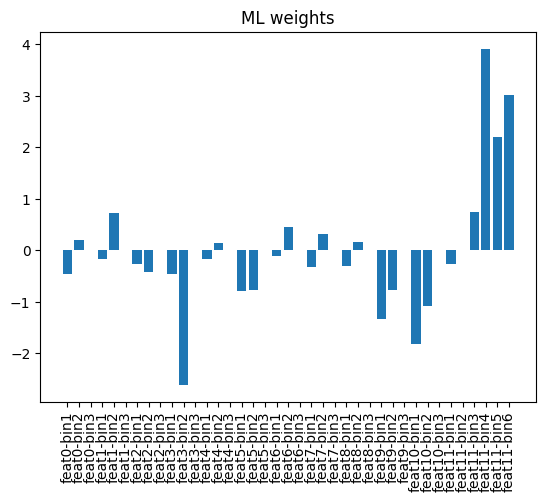

num of zero weights:  12
num of non-zero weights:  27
        Feature    Weight
0    feat0-bin1 -0.460423
1    feat0-bin2  0.198130
3    feat1-bin1 -0.172334
4    feat1-bin2  0.725520
6    feat2-bin1 -0.260422
7    feat2-bin2 -0.424796
9    feat3-bin1 -0.465110
10   feat3-bin2 -2.609600
12   feat4-bin1 -0.157595
13   feat4-bin2  0.139747
15   feat5-bin1 -0.782484
16   feat5-bin2 -0.767223
18   feat6-bin1 -0.111544
19   feat6-bin2  0.460149
21   feat7-bin1 -0.318288
22   feat7-bin2  0.329155
24   feat8-bin1 -0.293507
25   feat8-bin2  0.166614
27   feat9-bin1 -1.336519
28   feat9-bin2 -0.762575
30  feat10-bin1 -1.822864
31  feat10-bin2 -1.079361
33  feat11-bin1 -0.269117
35  feat11-bin3  0.753202
36  feat11-bin4  3.914931
37  feat11-bin5  2.196079
38  feat11-bin6  3.025727


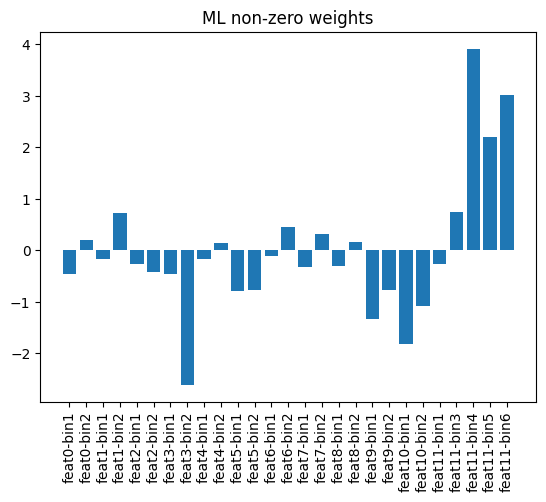

MSEs:  [0.05539882021031033, 0.04462682739163888, 0.055926115956900974, 0.05720882503848127, 0.054643406875320676, 0.056182657773217036, 0.05310415597742432, 0.04720369420215495, 0.05284761416110826, 0.05413032324268856]
accuracies:  [0.9446011797896897, 0.9553731726083611, 0.944073884043099, 0.9427911749615188, 0.9453565931246793, 0.9438173422267829, 0.9468958440225757, 0.952796305797845, 0.9471523858388917, 0.9458696767573115]
AUCs:  [0.9682174056114687, 0.9688351762974736, 0.955956452253983, 0.9547040094730217, 0.9522850352754132, 0.9565588668808586, 0.9626502931337153, 0.9688100344473519, 0.9582553575568878, 0.9624629442549104]
mean MSE:  0.05312724408292453
mean accuracy:  0.9468727559170755
mean AUC:  0.9608735575185084
Execution time: 174.40377712249756 seconds


In [ ]:
start_time = time.time()
scorecard = Scorecard()
car_caim_1ook_ml_model, car_caim_1ook_ml_weights = scorecard.fit(wine_quality_X, wine_quality_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                use_sbc=True)
scorecard.cross_val_score()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [10]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

Number of non-zero weights: 27


In [ ]:
start_time = time.time()
scorecard = Scorecard()
car_caim_1ook_ml_model, car_caim_1ook_ml_weights = scorecard.fit(wine_quality_X, wine_quality_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                use_sbc=True,
                num_nonzero_weights=num_nonzero_weights)
scorecard.cross_val_score()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

SBC reduction
number of features:  11
original num target classes:  7
original num observations:  6497
new num features:  12
new num target classes:  2
new num observations:  38982  (original num observations * 6 )
     0    1    2    3      4     5     6       7     8     9   10   11  \
0  7.4  0.7  0.0  1.9  0.076  11.0  34.0  0.9978  3.51  0.56  9.4  0.0   
1  7.4  0.7  0.0  1.9  0.076  11.0  34.0  0.9978  3.51  0.56  9.4  1.0   
2  7.4  0.7  0.0  1.9  0.076  11.0  34.0  0.9978  3.51  0.56  9.4  2.0   
3  7.4  0.7  0.0  1.9  0.076  11.0  34.0  0.9978  3.51  0.56  9.4  3.0   
4  7.4  0.7  0.0  1.9  0.076  11.0  34.0  0.9978  3.51  0.56  9.4  4.0   

   (binary_label)  
0               0  
1               0  
2               0  
3               0  
4               0  

discretization thresholds

thresholds  {0: [3.8499999999999996, 4.05, 4.300000000000001, 4.45, 4.55, 4.65, 4.75, 4.85, 4.95, 5.05, 5.15, 5.25, 5.35, 5.45, 5.55, 5.65, 5.75, 5.85, 5.95, 6.05, 6.125, 6.175000000000001, 6.

## car evaluation dataset
evaluate car acceptability

https://archive.ics.uci.edu/dataset/19/car+evaluation

In [2]:
# fetch dataset 
car_evaluation_data = fetch_ucirepo(id=19) 
  
# data (as pandas dataframes) 
car_evaluation_X = car_evaluation_data.data.features 
car_evaluation_y = car_evaluation_data.data.targets 
  
# metadata 
print(car_evaluation_data.metadata) 
  
# variable information 
print(car_evaluation_data.variables) 

{'uci_id': 19, 'name': 'Car Evaluation', 'repository_url': 'https://archive.ics.uci.edu/dataset/19/car+evaluation', 'data_url': 'https://archive.ics.uci.edu/static/public/19/data.csv', 'abstract': 'Derived from simple hierarchical decision model, this database may be useful for testing constructive induction and structure discovery methods.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1728, 'num_features': 6, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1988, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5JP48', 'creators': ['Marko Bohanec'], 'intro_paper': {'ID': 249, 'type': 'NATIVE', 'title': 'Knowledge acquisition and explanation for multi-attribute decision making', 'authors': 'M. Bohanec, V. Rajkovič', 'venue': '8th Intl Workshop on Expert Systems and their Applications, 

In [3]:
car_evaluation_y = pd.Series(car_evaluation_y['class'], name='class')

In [4]:
car_evaluation_y.value_counts()

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Class')

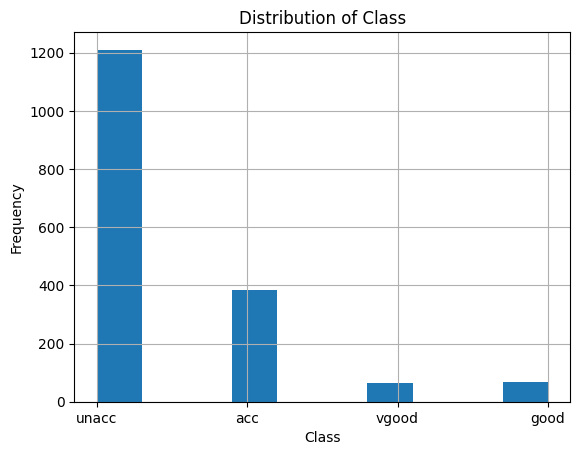

In [5]:
car_evaluation_y.hist()
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Distribution of Class')

In [6]:
# get type of each column
print("types: ", car_evaluation_X.dtypes)

# show categorical columns
print("\nobject columns: ", car_evaluation_X.select_dtypes(include=['object']).columns)
categorical_columns = car_evaluation_X.select_dtypes(include=['object']).columns

# show number of unique values in each categorical column
print("\nnumber of unique values in each categorical column: ", car_evaluation_X.select_dtypes(include=['object']).nunique())

# show values of all categorical columns
print("\nvalues of all categorical columns: ", car_evaluation_X.select_dtypes(include=['object']).apply(lambda x: x.unique()))

types:  buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

object columns:  Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'], dtype='object')

number of unique values in each categorical column:  buying      4
maint       4
doors       4
persons     3
lug_boot    3
safety      3
dtype: int64

values of all categorical columns:  buying      [vhigh, high, med, low]
maint       [vhigh, high, med, low]
doors              [2, 3, 4, 5more]
persons                [2, 4, more]
lug_boot          [small, med, big]
safety             [low, med, high]
dtype: object


In [11]:
categorical_columns = car_evaluation_X.select_dtypes(include=['object']).columns
print("categorical columns: ", categorical_columns)

# encode categorical columns
for col in categorical_columns:
    car_evaluation_X.loc[:, col] = car_evaluation_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {car_evaluation_X[col].unique()}")

categorical columns:  Index([], dtype='object')


SBC reduction
number of features:  6
original num target classes:  4
original num observations:  1728
mapping:  0    unacc
1      acc
2    vgood
3     good
dtype: object
new num features:  7
new num target classes:  2
new num observations:  5184  (original num observations * 3 )
   0  1  2  3  4  5  6  (binary_label)
0  3  3  0  0  2  1  0               1
1  3  3  0  0  2  1  1               1
2  3  3  0  0  2  1  2               1
3  3  3  0  0  2  2  0               1
4  3  3  0  0  2  2  1               1

discretization thresholds
num of features:  7
categorical features:  Index([], dtype='object')
aqui 1
sbc_column:  6
inicio fit  []
aqui 2
aqui 3
categorical aqui:  []
X shape[1]:  6
Feature non categorical  0
# 0  GLOBAL CAIM  1927.1667952674898
Feature non categorical  1
# 1  GLOBAL CAIM  1927.1667952674898
Feature non categorical  2
# 2  GLOBAL CAIM  1921.5217978395062
Feature non categorical  3
# 3  GLOBAL CAIM  1926.845775462963
Feature non categorical  4
# 4  GLOBAL CAIM  19

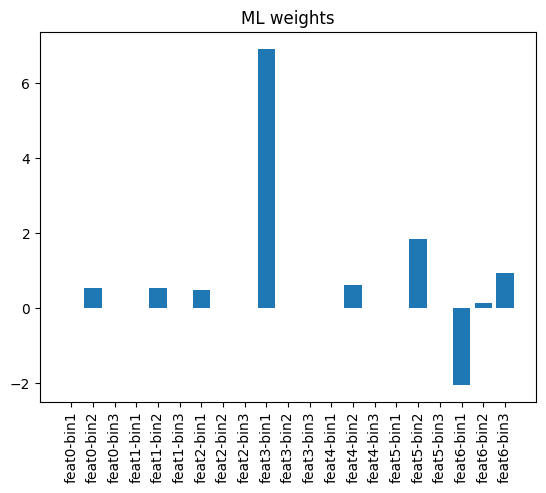

num of zero weights:  12
num of non-zero weights:  9
       Feature    Weight
1   feat0-bin2  0.523694
4   feat1-bin2  0.523383
6   feat2-bin1  0.469701
9   feat3-bin1  6.923211
13  feat4-bin2  0.605021
16  feat5-bin2  1.847365
18  feat6-bin1 -2.051859
19  feat6-bin2  0.131012
20  feat6-bin3  0.921711


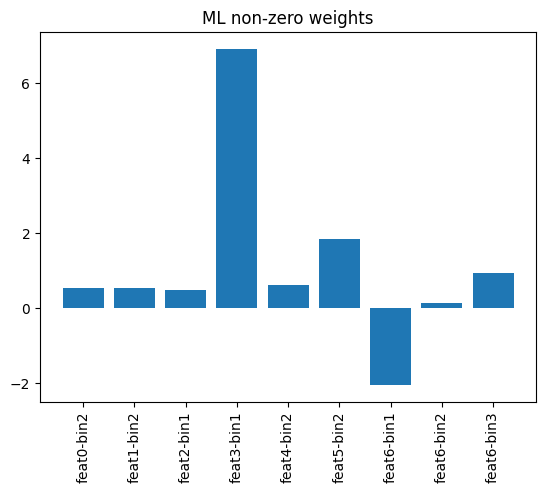

MSEs:  [0.12716763005780346, 0.1676300578034682, 0.11560693641618497, 0.18882466281310212, 0.16216216216216217, 0.13513513513513514, 0.12934362934362933, 0.138996138996139, 0.14671814671814673, 0.14478764478764478]
accuracies:  [0.8728323699421965, 0.8323699421965318, 0.884393063583815, 0.8111753371868978, 0.8378378378378378, 0.8648648648648649, 0.8706563706563707, 0.861003861003861, 0.8532818532818532, 0.8552123552123552]
AUCs:  [0.9179716629381058, 0.857320407655978, 0.9316430524484215, 0.7670925732538854, 0.6824240159441953, 0.7753799202790235, 0.9148604882909815, 0.748100398604883, 0.7174265072247135, 0.7701482311908321]
mean MSE:  0.1456372144233416
mean accuracy:  0.8543627855766583
mean AUC:  0.808236725783102
Execution time: 3.1369612216949463 seconds


In [17]:
start_time = time.time()
scorecard = Scorecard()
car_caim_1ook_ml_model, car_caim_1ook_ml_weights = scorecard.fit(car_evaluation_X, car_evaluation_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=True)
scorecard.cross_val_score()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [18]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

Number of non-zero weights: 9


SBC reduction
number of features:  6
original num target classes:  4
original num observations:  1728
mapping:  0    unacc
1      acc
2    vgood
3     good
dtype: object
new num features:  7
new num target classes:  2
new num observations:  5184  (original num observations * 3 )
   0  1  2  3  4  5  6  (binary_label)
0  3  3  0  0  2  1  0               1
1  3  3  0  0  2  1  1               1
2  3  3  0  0  2  1  2               1
3  3  3  0  0  2  2  0               1
4  3  3  0  0  2  2  1               1

discretization thresholds

thresholds  {0: [0.5, 1.5, 2.5], 1: [0.5, 1.5, 2.5], 2: [0.5, 1.5, 2.5], 3: [0.5, 1.5], 4: [0.5, 1.5], 5: [0.5, 1.5], 6: [0.5, 1.5]}
num of bins: 
  0: 4
  1: 4
  2: 4
  3: 3
  4: 3
  5: 3
  6: 3

encoding
X_disc shape:  (5184, 17)
X_disc columns:  Index(['feat0-bin1', 'feat0-bin2', 'feat0-bin3', 'feat1-bin1', 'feat1-bin2',
       'feat1-bin3', 'feat2-bin1', 'feat2-bin2', 'feat2-bin3', 'feat3-bin1',
       'feat3-bin2', 'feat4-bin1', 'feat4-bin2', 'feat5

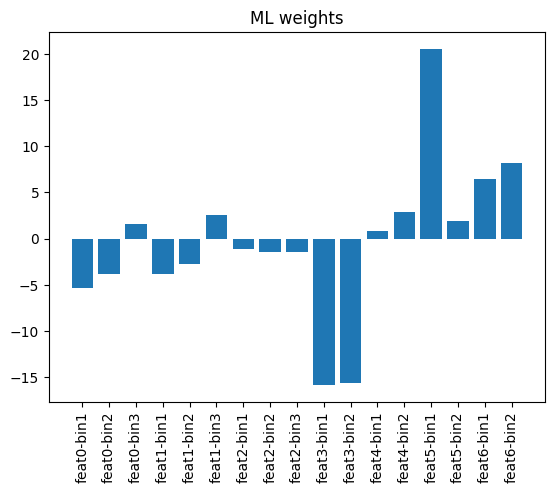

MSEs:  [0.12716763005780346, 0.1676300578034682, 0.11560693641618497, 0.18882466281310212, 0.16216216216216217, 0.13513513513513514, 0.12934362934362933, 0.138996138996139, 0.14671814671814673, 0.14478764478764478]
accuracies:  [0.8728323699421965, 0.8323699421965318, 0.884393063583815, 0.8111753371868978, 0.8378378378378378, 0.8648648648648649, 0.8706563706563707, 0.861003861003861, 0.8532818532818532, 0.8552123552123552]
AUCs:  [0.9180648769574944, 0.8546482724335073, 0.9314255530698483, 0.7667547146630629, 0.6831714000996512, 0.7765321375186846, 0.9145802192326856, 0.7483495266567015, 0.7174887892376682, 0.7710513203786746]
mean MSE:  0.1456372144233416
mean accuracy:  0.8543627855766583
mean AUC:  0.808206681024798
Execution time: 3.76725697517395 seconds


In [20]:
start_time = time.time()
scorecard = Scorecard()
car_infbins_1ook_ml_model, car_infbins_1ook_ml_weights = scorecard.fit(car_evaluation_X, car_evaluation_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K',
                model_method='ML',
                use_sbc=True,
                num_nonzero_weights=num_nonzero_weights)
scorecard.cross_val_score()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

SBC reduction
number of features:  6
original num target classes:  4
original num observations:  1728
mapping:  0    unacc
1      acc
2    vgood
3     good
dtype: object
new num features:  7
new num target classes:  2
new num observations:  5184  (original num observations * 3 )
   0  1  2  3  4  5  6  (binary_label)
0  3  3  0  0  2  1  0               1
1  3  3  0  0  2  1  1               1
2  3  3  0  0  2  1  2               1
3  3  3  0  0  2  2  0               1
4  3  3  0  0  2  2  1               1

discretization thresholds
num of features:  7
categorical features:  Index([], dtype='object')
aqui 1
sbc_column:  6
inicio fit  []
aqui 2
aqui 3
categorical aqui:  []
X shape[1]:  6
Feature non categorical  0
# 0  GLOBAL CAIM  1927.1667952674898
Feature non categorical  1
# 1  GLOBAL CAIM  1927.1667952674898
Feature non categorical  2
# 2  GLOBAL CAIM  1921.5217978395062
Feature non categorical  3
# 3  GLOBAL CAIM  1926.845775462963
Feature non categorical  4
# 4  GLOBAL CAIM  19

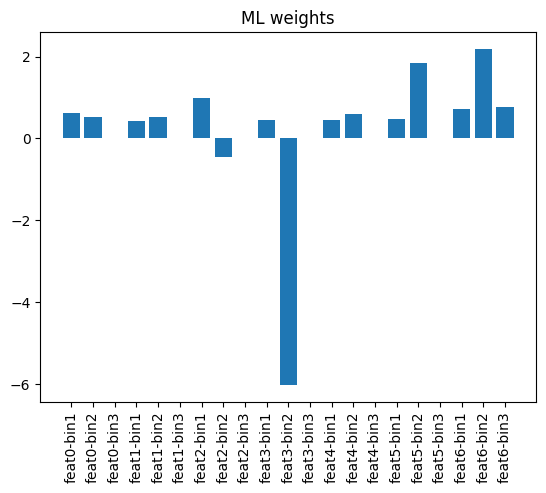

num of zero weights:  6
num of non-zero weights:  15
       Feature    Weight
0   feat0-bin1  0.630606
1   feat0-bin2  0.522035
3   feat1-bin1  0.416131
4   feat1-bin2  0.522152
6   feat2-bin1  0.998435
7   feat2-bin2 -0.452818
9   feat3-bin1  0.452212
10  feat3-bin2 -6.006420
12  feat4-bin1  0.450752
13  feat4-bin2  0.603737
15  feat5-bin1  0.476932
16  feat5-bin2  1.843702
18  feat6-bin1  0.709993
19  feat6-bin2  2.189591
20  feat6-bin3  0.779685


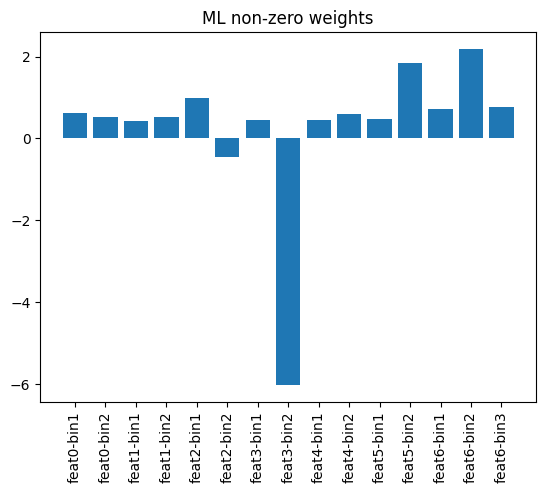

MSEs:  [0.12716763005780346, 0.1676300578034682, 0.11560693641618497, 0.18882466281310212, 0.16216216216216217, 0.13513513513513514, 0.1274131274131274, 0.138996138996139, 0.14671814671814673, 0.14478764478764478]
accuracies:  [0.8728323699421965, 0.8323699421965318, 0.884393063583815, 0.8111753371868978, 0.8378378378378378, 0.8648648648648649, 0.8725868725868726, 0.861003861003861, 0.8532818532818532, 0.8552123552123552]
AUCs:  [0.9180959482972905, 0.8577864777529207, 0.9317673378076063, 0.7670925732538854, 0.6824240159441953, 0.7753799202790235, 0.9148604882909815, 0.7482249626307922, 0.7174265072247135, 0.7701482311908321]
mean MSE:  0.1454441642302914
mean accuracy:  0.8545558357697086
mean AUC:  0.8083206462672241
Execution time: 8.538292169570923 seconds


In [21]:
start_time = time.time()
scorecard = Scorecard()
car_caim_diffcoding_ml_model, car_caim_diffcoding_ml_weights = scorecard.fit(car_evaluation_X, car_evaluation_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING',
                model_method='ML',
                use_sbc=True)
scorecard.cross_val_score()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [22]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

Number of non-zero weights: 15


SBC reduction
number of features:  6
original num target classes:  4
original num observations:  1728
mapping:  0    unacc
1      acc
2    vgood
3     good
dtype: object
new num features:  7
new num target classes:  2
new num observations:  5184  (original num observations * 3 )
   0  1  2  3  4  5  6  (binary_label)
0  3  3  0  0  2  1  0               1
1  3  3  0  0  2  1  1               1
2  3  3  0  0  2  1  2               1
3  3  3  0  0  2  2  0               1
4  3  3  0  0  2  2  1               1

discretization thresholds

thresholds  {0: [0.5, 1.5, 2.5], 1: [0.5, 1.5, 2.5], 2: [0.5, 1.5, 2.5], 3: [0.5, 1.5], 4: [0.5, 1.5], 5: [0.5, 1.5], 6: [0.5, 1.5]}
num of bins: 
  0: 4
  1: 4
  2: 4
  3: 3
  4: 3
  5: 3
  6: 3

encoding

model
ML best parameters:  {'C': 1000.0}
ML best alpha:  0.001
ML weights:
        Feature     Weight
0   feat0-bin1  -5.307080
1   feat0-bin2   1.532993
2   feat0-bin3   5.339032
3   feat1-bin1  -3.831259
4   feat1-bin2   1.053878
5   feat1-bin3   5.

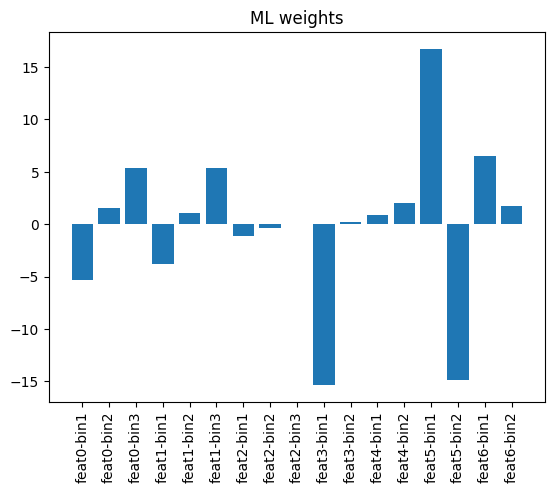

MSEs:  [0.12716763005780346, 0.1676300578034682, 0.11560693641618497, 0.18882466281310212, 0.16216216216216217, 0.13513513513513514, 0.12934362934362933, 0.138996138996139, 0.14671814671814673, 0.14478764478764478]
accuracies:  [0.8728323699421965, 0.8323699421965318, 0.884393063583815, 0.8111753371868978, 0.8378378378378378, 0.8648648648648649, 0.8706563706563707, 0.861003861003861, 0.8532818532818532, 0.8552123552123552]
AUCs:  [0.9180338056176981, 0.8554250559284117, 0.9314255530698483, 0.7668161434977578, 0.6831714000996512, 0.7765321375186846, 0.9145802192326856, 0.7483495266567015, 0.7174887892376682, 0.7710513203786746]
mean MSE:  0.1456372144233416
mean accuracy:  0.8543627855766583
mean AUC:  0.8082873951237783
Execution time: 6.362859010696411 seconds


In [23]:
start_time = time.time()
car_infbins_diffcoding_ml_model, car_infbins_diffcoding_ml_weights = scorecard.fit(car_evaluation_X, car_evaluation_y, categorical_columns, 
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING',
                model_method='ML',
                use_sbc=True,
                num_nonzero_weights=num_nonzero_weights)
scorecard.cross_val_score()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

## abalone
predict the age of abalone from physical measurements?

https://archive.ics.uci.edu/dataset/1/abalone

{'uci_id': 1, 'name': 'Abalone', 'repository_url': 'https://archive.ics.uci.edu/dataset/1/abalone', 'data_url': 'https://archive.ics.uci.edu/static/public/1/data.csv', 'abstract': 'Predict the age of abalone from physical measurements', 'area': 'Biology', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Tabular'], 'num_instances': 4177, 'num_features': 8, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['Rings'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C55C7W', 'creators': ['Warwick Nash', 'Tracy Sellers', 'Simon Talbot', 'Andrew Cawthorn', 'Wes Ford'], 'intro_paper': None, 'additional_info': {'summary': 'Predicting the age of abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- 

Text(0.5, 1.0, 'Distribution of Rings')

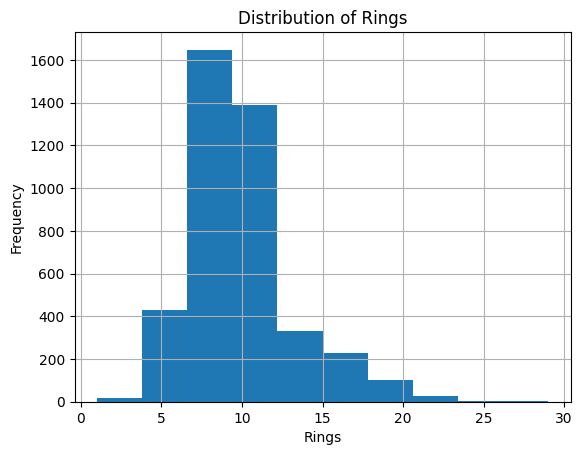

In [2]:
# fetch dataset 
abalone_data = fetch_ucirepo(id=1) 
  
# data (as pandas dataframes) 
abalone_X = abalone_data.data.features 
abalone_y = abalone_data.data.targets 
  
# metadata 
print(abalone_data.metadata) 
  
# variable information 
print(abalone_data.variables) 

abalone_y  = pd.Series(abalone_y ['Rings'], name='Rings')
print(abalone_y .value_counts())
abalone_y.hist()
plt.xlabel('Rings')
plt.ylabel('Frequency')
plt.title('Distribution of Rings')

In [3]:
categorical_columns = abalone_X.select_dtypes(include=['object']).columns
print("categorical columns: ", categorical_columns)

# encode categorical columns
for col in categorical_columns:
    abalone_X.loc[:, col] = abalone_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {abalone_X[col].unique()}")

categorical columns:  Index(['Sex'], dtype='object')
Column Sex encoded as: [2 0 1]


In [4]:
start_time = time.time()

scorecard = Scorecard()
abalone_caim_1ook_ml_model, abalone_caim_1ook_ml_weights = scorecard.fit(abalone_X, abalone_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=True)
scorecard.cross_val_score()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

SBC reduction
number of features:  8
original num target classes:  28
original num observations:  4177
new num features:  9
new num target classes:  2
new num observations:  112779  (original num observations * 27 )
   0      1      2      3      4       5      6     7  8  (binary_label)
0  2  0.455  0.365  0.095  0.514  0.2245  0.101  0.15  0               0
1  2  0.455  0.365  0.095  0.514  0.2245  0.101  0.15  1               0
2  2  0.455  0.365  0.095  0.514  0.2245  0.101  0.15  2               0
3  2  0.455  0.365  0.095  0.514  0.2245  0.101  0.15  3               0
4  2  0.455  0.365  0.095  0.514  0.2245  0.101  0.15  4               0

discretization thresholds
num of features:  9
categorical features:  Index(['Sex'], dtype='object')


KeyError: 'Sex'

In [32]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

AttributeError: 'NoneType' object has no attribute 'shape'

In [34]:
start_time = time.time()

scorecard = Scorecard()
abalone_infbins_1ook_ml_model, abalone_infbins_1ook_ml_weights = scorecard.fit(abalone_X, abalone_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=True,
                num_nonzero_weights=10)
scorecard.cross_val_score()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

SBC reduction
number of features:  8
original num target classes:  28
original num observations:  4177
new num features:  9
new num target classes:  2
new num observations:  112779  (original num observations * 27 )
   0      1      2      3      4       5      6     7  8  (binary_label)
0  2  0.455  0.365  0.095  0.514  0.2245  0.101  0.15  0               0
1  2  0.455  0.365  0.095  0.514  0.2245  0.101  0.15  1               0
2  2  0.455  0.365  0.095  0.514  0.2245  0.101  0.15  2               0
3  2  0.455  0.365  0.095  0.514  0.2245  0.101  0.15  3               0
4  2  0.455  0.365  0.095  0.514  0.2245  0.101  0.15  4               0

discretization thresholds

thresholds  {0: [0.5, 1.5], 1: [0.0925, 0.12, 0.1325, 0.1375, 0.14500000000000002, 0.1525, 0.1575, 0.1625, 0.1675, 0.1725, 0.1775, 0.1825, 0.1875, 0.1925, 0.1975, 0.2025, 0.2075, 0.2125, 0.2175, 0.2225, 0.2275, 0.23249999999999998, 0.2375, 0.2425, 0.2475, 0.2525, 0.2575, 0.2625, 0.2675, 0.2725, 0.2775, 0.2825, 0.2875

KeyboardInterrupt: 

In [ ]:
start_time = time.time()

scorecard = Scorecard()
abalone_caim_diffcoding_ml_model, abalone_caim_diffcoding_ml_weights = scorecard.fit(abalone_X, abalone_y,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                use_sbc=True)
scorecard.cross_val_score()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()
scorecard = Scorecard()
abalone_infbins_diffcoding_ml_model, abalone_infbins_diffcoding_ml_weights = scorecard.fit(abalone_X, abalone_y,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                use_sbc=True,
                num_nonzero_weights=num_nonzero_weights)
scorecard.cross_val_score()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

## balance scale
classify each example as having the balance scale tip to the right, tip to the left, or be balanced (from 1 to 5)

https://archive.ics.uci.edu/dataset/12/balance+scale

{'uci_id': 12, 'name': 'Balance Scale', 'repository_url': 'https://archive.ics.uci.edu/dataset/12/balance+scale', 'data_url': 'https://archive.ics.uci.edu/static/public/12/data.csv', 'abstract': 'Balance scale weight & distance database', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 625, 'num_features': 4, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1976, 'last_updated': 'Fri Feb 09 2024', 'dataset_doi': '10.24432/C5488X', 'creators': ['R. Siegler'], 'intro_paper': None, 'additional_info': {'summary': 'This data set was generated to model psychological experimental results.  Each example is classified as having the balance scale tip to the right, tip to the left, or be balanced.  The attributes are the left weight, the left distance, the right weight, and the right distance.  The corr

Text(0.5, 1.0, 'Distribution of Class')

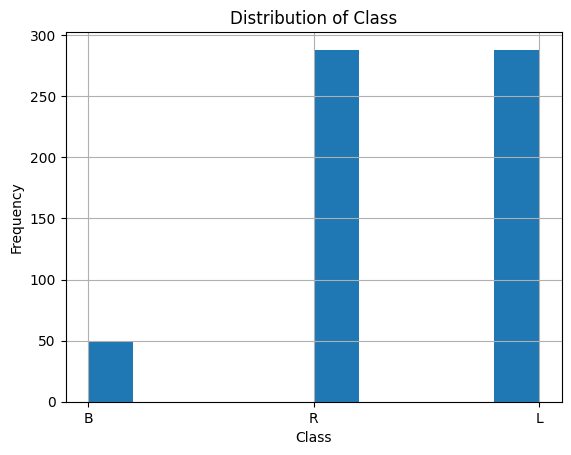

In [5]:
# fetch dataset 
balance_scale_data = fetch_ucirepo(id=12) 
  
# data (as pandas dataframes) 
balance_scale_X = balance_scale_data.data.features 
balance_scale_y = balance_scale_data.data.targets 
  
# metadata 
print(balance_scale_data.metadata) 
  
# variable information 
print(balance_scale_data.variables) 

balance_scale_y  = pd.Series(balance_scale_y['class'], name='class')
print(balance_scale_y.value_counts())
balance_scale_y.hist()
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Distribution of Class')

In [7]:
categorical_columns = balance_scale_X.select_dtypes(include=['object']).columns
print("categorical columns: ", categorical_columns)

# encode categorical columns
for col in categorical_columns:
    balance_scale_X.loc[:, col] = balance_scale_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {balance_scale_X[col].unique()}")

categorical columns:  Index([], dtype='object')


SBC reduction
number of features:  4
original num target classes:  3
original num observations:  625
mapping:  0    B
1    R
2    L
dtype: object
new num features:  5
new num target classes:  2
new num observations:  1250  (original num observations * 2 )
   0  1  2  3  4  (binary_label)
0  1  1  1  1  0               1
1  1  1  1  1  1               1
2  2  1  1  1  0               0
3  2  1  1  1  1               1
4  3  1  1  1  0               0

discretization thresholds
num of features:  5
categorical features:  Index([], dtype='object')
aqui 1
sbc_column:  4
inicio fit  []
aqui 2
aqui 3
categorical aqui:  []
X shape[1]:  4
Feature non categorical  0
# 0  GLOBAL CAIM  303.17466666666667
Feature non categorical  1
# 1  GLOBAL CAIM  303.17466666666667
Feature non categorical  2
# 2  GLOBAL CAIM  303.9376666666667
Feature non categorical  3
# 3  GLOBAL CAIM  303.9376666666667

thresholds  {0: [1.0, 2.0, 6.0], 1: [1.0, 2.0, 6.0], 2: [1.0, 2.0, 6.0], 3: [1.0, 2.0, 6.0], 4: [0.0, 1.0]}

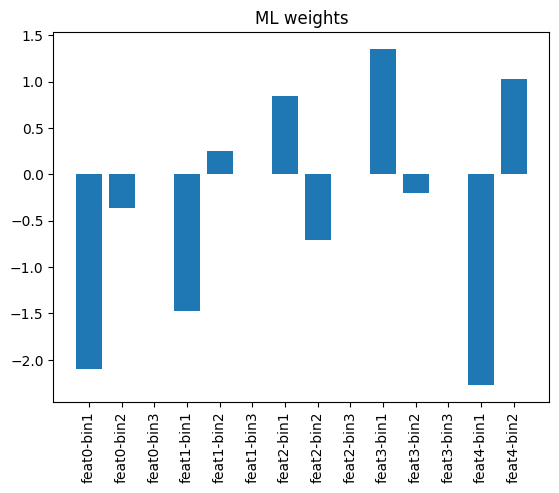

num of zero weights:  4
num of non-zero weights:  10
       Feature    Weight
0   feat0-bin1 -2.100843
1   feat0-bin2 -0.368141
3   feat1-bin1 -1.479976
4   feat1-bin2  0.252636
6   feat2-bin1  0.843692
7   feat2-bin2 -0.714007
9   feat3-bin1  1.353602
10  feat3-bin2 -0.204080
12  feat4-bin1 -2.270222
13  feat4-bin2  1.024439


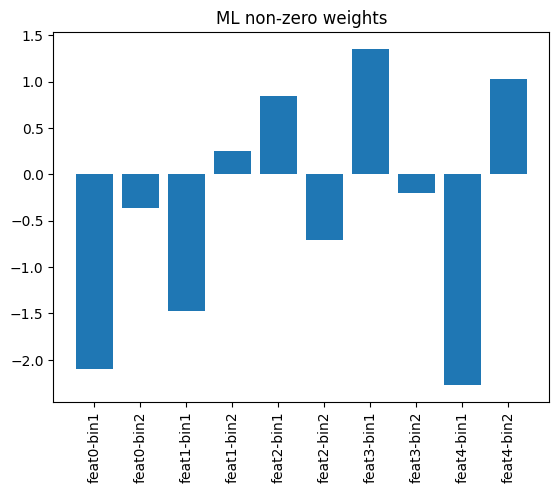

MSEs:  [0.176, 0.064, 0.152, 0.072, 0.088, 0.04, 0.072, 0.064, 0.088, 0.16]
accuracies:  [0.824, 0.936, 0.848, 0.928, 0.912, 0.96, 0.928, 0.936, 0.912, 0.84]
AUCs:  [0.915324985092427, 0.9335122242098988, 0.8822301729278473, 0.9186046511627908, 0.9117471675611211, 0.9347048300536672, 0.9192377495462796, 0.9050211736237144, 0.8998790078644888, 0.9007864488808228]
mean MSE:  0.09759999999999999
mean accuracy:  0.9024000000000001
mean AUC:  0.9121048410923057
Execution time: 0.3928990364074707 seconds


In [8]:
start_time = time.time()

scorecard = Scorecard()
balance_scale_caim_1ook_ml_model, balance_scale_caim_1ook_ml_weights = scorecard.fit(balance_scale_X, balance_scale_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=True)
scorecard.cross_val_score()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [9]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

Number of non-zero weights: 10


SBC reduction
number of features:  4
original num target classes:  3
original num observations:  625
mapping:  0    B
1    R
2    L
dtype: object
new num features:  5
new num target classes:  2
new num observations:  1250  (original num observations * 2 )
   0  1  2  3  4  (binary_label)
0  1  1  1  1  0               1
1  1  1  1  1  1               1
2  2  1  1  1  0               0
3  2  1  1  1  1               1
4  3  1  1  1  0               0

discretization thresholds

thresholds  {0: [1.5, 2.5, 3.5, 4.5], 1: [1.5, 2.5, 3.5, 4.5], 2: [1.5, 2.5, 3.5, 4.5], 3: [1.5, 2.5, 3.5, 4.5], 4: [0.5]}
num of bins: 
  0: 5
  1: 5
  2: 5
  3: 5
  4: 2

encoding
X_disc shape:  (1250, 17)
X_disc columns:  Index(['feat0-bin1', 'feat0-bin2', 'feat0-bin3', 'feat0-bin4', 'feat1-bin1',
       'feat1-bin2', 'feat1-bin3', 'feat1-bin4', 'feat2-bin1', 'feat2-bin2',
       'feat2-bin3', 'feat2-bin4', 'feat3-bin1', 'feat3-bin2', 'feat3-bin3',
       'feat3-bin4', 'feat4-bin1'],
      dtype='object')
X_di

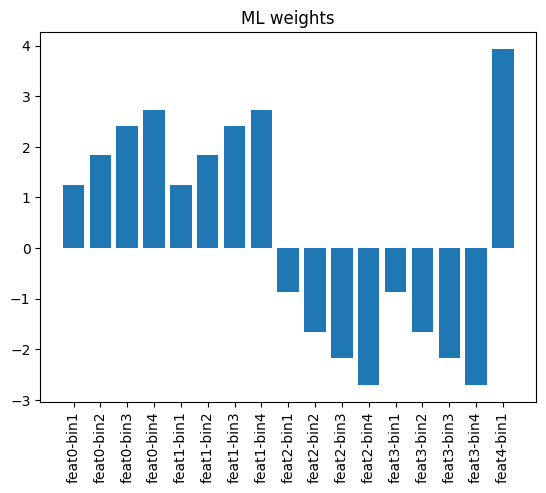

MSEs:  [0.176, 0.064, 0.152, 0.072, 0.088, 0.04, 0.072, 0.064, 0.088, 0.16]
accuracies:  [0.824, 0.936, 0.848, 0.928, 0.912, 0.96, 0.928, 0.936, 0.912, 0.84]
AUCs:  [0.915324985092427, 0.9335122242098988, 0.8822301729278473, 0.9186046511627908, 0.9117471675611211, 0.9347048300536672, 0.9192377495462796, 0.9050211736237144, 0.8998790078644888, 0.9007864488808228]
mean MSE:  0.09759999999999999
mean accuracy:  0.9024000000000001
mean AUC:  0.9121048410923057
Execution time: 0.3412799835205078 seconds


In [10]:
start_time = time.time()

scorecard = Scorecard()
balance_scale_infbins_1ook_ml_model, balance_scale_infbins_1ook_ml_weights = scorecard.fit(balance_scale_X, balance_scale_y,categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=True,
                num_nonzero_weights=num_nonzero_weights)
scorecard.cross_val_score()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

SBC reduction
number of features:  4
original num target classes:  3
original num observations:  625
mapping:  0    B
1    R
2    L
dtype: object
new num features:  5
new num target classes:  2
new num observations:  1250  (original num observations * 2 )
   0  1  2  3  4  (binary_label)
0  1  1  1  1  0               1
1  1  1  1  1  1               1
2  2  1  1  1  0               0
3  2  1  1  1  1               1
4  3  1  1  1  0               0

discretization thresholds
num of features:  5
categorical features:  Index([], dtype='object')
aqui 1
sbc_column:  4
inicio fit  []
aqui 2
aqui 3
categorical aqui:  []
X shape[1]:  4
Feature non categorical  0
# 0  GLOBAL CAIM  303.17466666666667
Feature non categorical  1
# 1  GLOBAL CAIM  303.17466666666667
Feature non categorical  2
# 2  GLOBAL CAIM  303.9376666666667
Feature non categorical  3
# 3  GLOBAL CAIM  303.9376666666667

thresholds  {0: [1.0, 2.0, 6.0], 1: [1.0, 2.0, 6.0], 2: [1.0, 2.0, 6.0], 3: [1.0, 2.0, 6.0], 4: [0.0, 1.0]}

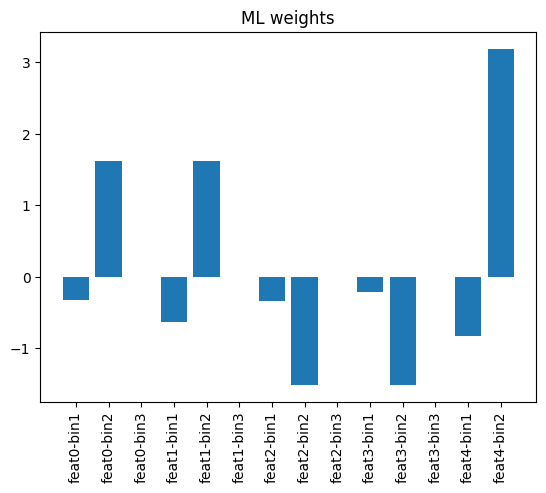

num of zero weights:  4
num of non-zero weights:  10
       Feature    Weight
0   feat0-bin1 -0.324221
1   feat0-bin2  1.615440
3   feat1-bin1 -0.630871
4   feat1-bin2  1.615515
6   feat2-bin1 -0.337742
7   feat2-bin2 -1.507156
9   feat3-bin1 -0.213626
10  feat3-bin2 -1.507220
12  feat4-bin1 -0.824375
13  feat4-bin2  3.191133


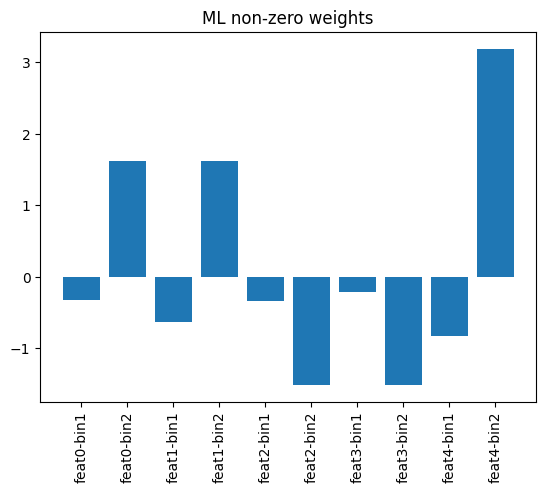

MSEs:  [0.176, 0.064, 0.152, 0.072, 0.088, 0.04, 0.072, 0.064, 0.096, 0.16]
accuracies:  [0.824, 0.936, 0.848, 0.928, 0.912, 0.96, 0.928, 0.936, 0.904, 0.84]
AUCs:  [0.915324985092427, 0.9335122242098988, 0.8831246273106738, 0.9221824686940967, 0.915324985092427, 0.9355992844364938, 0.9192377495462796, 0.9077434966727163, 0.8998790078644888, 0.9004839685420447]
mean MSE:  0.0984
mean accuracy:  0.9016
mean AUC:  0.9132412797461544
Execution time: 0.34919095039367676 seconds


In [11]:
start_time = time.time()

scorecard = Scorecard()
balance_scale_caim_diffcoding_ml_model, balance_scale_caim_diffcoding_ml_weights = scorecard.fit(balance_scale_X, balance_scale_y,categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                use_sbc=True)
scorecard.cross_val_score()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [12]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

Number of non-zero weights: 10


SBC reduction
number of features:  4
original num target classes:  3
original num observations:  625
mapping:  0    B
1    R
2    L
dtype: object
new num features:  5
new num target classes:  2
new num observations:  1250  (original num observations * 2 )
   0  1  2  3  4  (binary_label)
0  1  1  1  1  0               1
1  1  1  1  1  1               1
2  2  1  1  1  0               0
3  2  1  1  1  1               1
4  3  1  1  1  0               0

discretization thresholds

thresholds  {0: [1.5, 2.5, 3.5, 4.5], 1: [1.5, 2.5, 3.5, 4.5], 2: [1.5, 2.5, 3.5, 4.5], 3: [1.5, 2.5, 3.5, 4.5], 4: [0.5]}
num of bins: 
  0: 5
  1: 5
  2: 5
  3: 5
  4: 2

encoding

model
ML best parameters:  {'C': 100.0}
ML best alpha:  0.01
ML weights:
        Feature    Weight
0   feat0-bin1  1.240223
1   feat0-bin2  0.602942
2   feat0-bin3  0.568339
3   feat0-bin4  0.310665
4   feat1-bin1  1.240220
5   feat1-bin2  0.602936
6   feat1-bin3  0.568308
7   feat1-bin4  0.310654
8   feat2-bin1 -0.865160
9   feat2-b

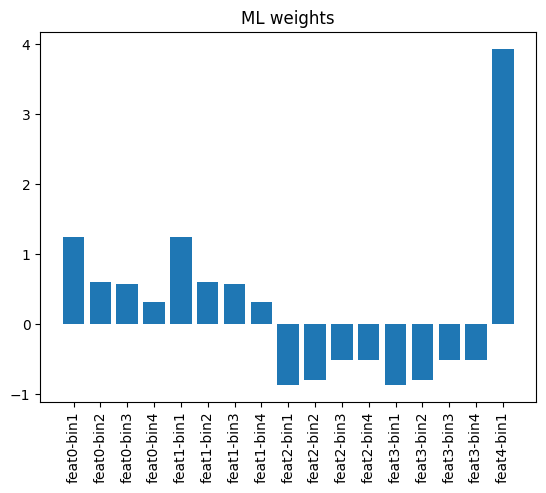

MSEs:  [0.176, 0.064, 0.152, 0.072, 0.088, 0.04, 0.072, 0.064, 0.088, 0.16]
accuracies:  [0.824, 0.936, 0.848, 0.928, 0.912, 0.96, 0.928, 0.936, 0.912, 0.84]
AUCs:  [0.915324985092427, 0.9335122242098988, 0.8822301729278473, 0.9186046511627908, 0.9117471675611211, 0.9347048300536672, 0.9192377495462796, 0.9050211736237144, 0.8998790078644888, 0.9007864488808228]
mean MSE:  0.09759999999999999
mean accuracy:  0.9024000000000001
mean AUC:  0.9121048410923057
Execution time: 0.4456291198730469 seconds


In [13]:
start_time = time.time()
scorecard = Scorecard()
balance_scale_infbins_diffcoding_ml_model, balance_scale_infbins_diffcoding_ml_weights = scorecard.fit(balance_scale_X, balance_scale_y,categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                use_sbc=True,
                num_nonzero_weights=num_nonzero_weights)
scorecard.cross_val_score()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

## lenses

classes:
- 1 : the patient should be fitted with hard contact lenses,
- 2 : the patient should be fitted with soft contact lenses,
- 3 : the patient should not be fitted with contact lenses.


https://archive.ics.uci.edu/dataset/58/lenses

{'uci_id': 58, 'name': 'Lenses', 'repository_url': 'https://archive.ics.uci.edu/dataset/58/lenses', 'data_url': 'https://archive.ics.uci.edu/static/public/58/data.csv', 'abstract': 'Database for fitting contact lenses', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 24, 'num_features': 3, 'feature_types': ['Categorical'], 'demographics': ['Age'], 'target_col': ['class'], 'index_col': ['id'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1987, 'last_updated': 'Mon Feb 26 2024', 'dataset_doi': '10.24432/C5K88Z', 'creators': ['J. Cendrowska'], 'intro_paper': None, 'additional_info': {'summary': 'The examples are complete and noise free. The examples highly simplified the problem. The attributes do not fully describe all the factors affecting the decision as to which type, if any, to fit.\r\n\r\n Notes:  \r\n\r\n--This database is complete (all possible combinations of attribute-value pairs are re

Text(0.5, 1.0, 'Distribution of Class')

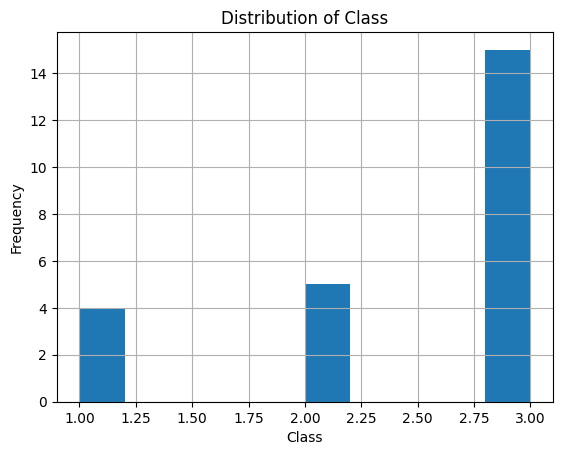

In [4]:
# fetch dataset 
lenses_data = fetch_ucirepo(id=58) 
  
# data (as pandas dataframes) 
lenses_X = lenses_data.data.features 
lenses_y = lenses_data.data.targets
  
# metadata 
print(lenses_data.metadata) 
  
# variable information 
print(lenses_data.variables) 

lenses_y  = pd.Series(lenses_y['class'], name='class')
print(lenses_y.value_counts())
lenses_y.hist()
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Distribution of Class')

In [ ]:
categorical_columns = lenses_X.select_dtypes(include=['object']).columns
print("categorical columns: ", categorical_columns)

# encode categorical columns
for col in categorical_columns:
    lenses_X.loc[:, col] = lenses_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {lenses_X[col].unique()}")

categorical columns:  Index([], dtype='object')
First feature name:  age


In [6]:
start_time = time.time()

scorecard = Scorecard()
lenses_caim_1ook_ml_model, lenses_caim_1ook_ml_weights = scorecard.fit(lenses_X, lenses_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=True)
scorecard.cross_val_score()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

SBC reduction
number of features:  3
original num target classes:  3
original num observations:  24
new num features:  4
new num target classes:  2
new num observations:  48  (original num observations * 2 )
   0  1  2  3  (binary_label)
0  1  1  1  0               0
1  1  1  1  1               0
2  1  1  2  0               0
3  1  1  2  1               0
4  1  2  1  0               0

discretization thresholds
num of features:  4
categorical features:  Index([], dtype='object')
aqui 1
sbc_column:  3
inicio fit  []
aqui 2
aqui 3
categorical aqui:  []
X shape[1]:  3
Feature non categorical  0


NotEnoughPoints: The feature #0 does not have enough unique values for discretization! Add it to categorical list!

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()

scorecard = Scorecard()
lenses_infbins_1ook_ml_model, lenses_infbins_1ook_ml_weights = scorecard.fit(lenses_X, lenses_y,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=True,
                num_nonzero_weights=num_nonzero_weights)
scorecard.cross_val_score()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
lenses_caim_diffcoding_ml_model, lenses_caim_diffcoding_ml_weights = scorecard.fit(lenses_X, lenses_y,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                use_sbc=True)
scorecard.cross_val_score()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()

scorecard = Scorecard()
lenses_infbins_diffcoding_ml_model, lenses_infbins_diffcoding_ml_weights = scorecard.fit(lenses_X, lenses_y,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                use_sbc=True,
                num_nonzero_weights=num_nonzero_weights)
scorecard.cross_val_score()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

## student performance
predict student performance in secondary education (high school)

https://archive.ics.uci.edu/dataset/320/student+performance

{'uci_id': 320, 'name': 'Student Performance', 'repository_url': 'https://archive.ics.uci.edu/dataset/320/student+performance', 'data_url': 'https://archive.ics.uci.edu/static/public/320/data.csv', 'abstract': 'Predict student performance in secondary education (high school). ', 'area': 'Social Science', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 649, 'num_features': 30, 'feature_types': ['Integer'], 'demographics': ['Sex', 'Age', 'Other', 'Education Level', 'Occupation'], 'target_col': ['G1', 'G2', 'G3'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2008, 'last_updated': 'Fri Jan 05 2024', 'dataset_doi': '10.24432/C5TG7T', 'creators': ['Paulo Cortez'], 'intro_paper': {'ID': 360, 'type': 'NATIVE', 'title': 'Using data mining to predict secondary school student performance', 'authors': 'P. Cortez, A. M. G. Silva', 'venue': 'Proceedings of 5th Annual Future Business Technolo

Text(0.5, 1.0, 'Distribution of Class')

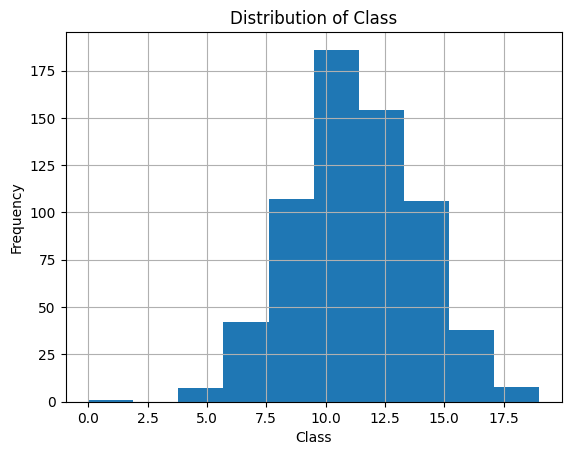

In [11]:
# fetch dataset 
student_performance_data = fetch_ucirepo(id=320) 
  
# data (as pandas dataframes) 
student_performance_X = student_performance_data.data.features 
student_performance_y = student_performance_data.data.targets 
  
# metadata 
print(student_performance_data.metadata) 
  
# variable information 
print(student_performance_data.variables) 

student_performance_y = pd.Series(student_performance_y['G1'], name='G1')
print(student_performance_y.value_counts())
student_performance_y.hist()
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Distribution of Class')

In [12]:
categorical_columns = student_performance_X.select_dtypes(include=['object']).columns
print("categorical columns: ", categorical_columns)

# encode categorical columns
for col in categorical_columns:
    student_performance_X.loc[:, col] = student_performance_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {student_performance_X[col].unique()}")

categorical columns:  Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')
Column school encoded as: [0 1]
Column sex encoded as: [0 1]
Column address encoded as: [1 0]
Column famsize encoded as: [0 1]
Column Pstatus encoded as: [0 1]
Column Mjob encoded as: [0 1 2 3 4]
Column Fjob encoded as: [4 2 3 1 0]
Column reason encoded as: [0 2 1 3]
Column guardian encoded as: [1 0 2]
Column schoolsup encoded as: [1 0]
Column famsup encoded as: [0 1]
Column paid encoded as: [0 1]
Column activities encoded as: [0 1]
Column nursery encoded as: [1 0]
Column higher encoded as: [1 0]
Column internet encoded as: [0 1]
Column romantic encoded as: [0 1]


In [13]:
start_time = time.time()

scorecard = Scorecard()
student_performance_caim_1ook_ml_model, student_performance_caim_1ook_ml_weights = scorecard.fit(student_performance_X, student_performance_y, categorical_columns, 
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=True)
scorecard.cross_val_score()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

SBC reduction
number of features:  30
original num target classes:  17
original num observations:  649
new num features:  31
new num target classes:  2
new num observations:  10384  (original num observations * 16 )
   0  1   2  3  4  5  6  7  8  9  ...  22  23  24  25  26  27  28  29  30  \
0  0  0  18  1  0  0  4  4  0  4  ...   0   4   3   4   1   1   3   4   0   
1  0  0  18  1  0  0  4  4  0  4  ...   0   4   3   4   1   1   3   4   1   
2  0  0  18  1  0  0  4  4  0  4  ...   0   4   3   4   1   1   3   4   2   
3  0  0  18  1  0  0  4  4  0  4  ...   0   4   3   4   1   1   3   4   3   
4  0  0  18  1  0  0  4  4  0  4  ...   0   4   3   4   1   1   3   4   4   

   (binary_label)  
0               1  
1               1  
2               1  
3               1  
4               1  

[5 rows x 32 columns]

discretization thresholds
num of features:  31
categorical features:  Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'scho

KeyError: 'school'

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()

scorecard = Scorecard()
student_performance_infbins_1ook_ml_model, student_performance_infbins_1ook_ml_weights = scorecard.fit(student_performance_X, student_performance_y, categorical_columns,   
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=True,
                num_nonzero_weights=num_nonzero_weights)
scorecard.cross_val_score()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
student_performance_caim_diffcoding_ml_model, student_performance_caim_diffcoding_ml_weights = scorecard.fit(student_performance_X, student_performance_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                use_sbc=True)
scorecard.cross_val_score()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()

scorecard = Scorecard()
student_performance_infbins_diffcoding_ml_model, student_performance_infbins_diffcoding_ml_weights = scorecard.fit(student_performance_X, student_performance_y, categorical_columns,   
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                use_sbc=True,
                num_nonzero_weights=num_nonzero_weights)
scorecard.cross_val_score()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")